# Прогнозирование оттока клиентов

### Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 
1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Цель проекта

Построить модель для определения оттока клиентов.

### Описание данных

**Данные состоят из файлов, полученных из разных источников:**
- <code>contract_new.csv</code> — информация о договоре;
- <code>personal_new.csv</code> — персональные данные клиента;
- <code>internet_new.csv</code> — информация об интернет-услугах;
- <code>phone_new.csv</code> — информация об услугах телефонии.

**Поля:**
- <code>BeginDate</code> – дата начала пользования услугами.
- <code>EndDate</code> – дата окончания пользования услугами.
- <code>Type</code> – тип оплаты: ежемесячный, годовой и тд.
- <code>PaperlessBilling</code> – безналичный расчет.
- <code>PaymentMethod</code> – способ оплаты.
- <code>MonthlyCharges</code> – ежемесячные траты на услуги.
- <code>TotalCharges</code> – всего потрачено денег на услуги.
- <code>Dependents</code> – наличие иждивенцев.
- <code>Senior Citizen</code> – наличие пенсионного статуса по возрасту.
- <code>Partner</code> – наличие супруга(и).
- <code>MultipleLines</code> – наличие возможности ведения параллельных линий во время звонка.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### План проекта

1. Загрузить и изучить данные;
2. Провести предобработку данных:
    - работа с пропусками,
    - работа с дубликатами,
    - объединение таблиц в одну;
3. Провести исследовательский анализ данных:
    - визуализация признаков,
    - проверить данные на наличие мультиколлинеарности,
    - проверить данные на дисбаланс классов;
4. Подготовить признаки и разбить данные на выборки;  
5. Исследовать модели (будем решать задачу с учителем: в распоряжении обучающий набор данных и целевой признак, который нужно предсказать по остальным признакам),
    - RandomForestClassifier,
    - CatBoost;
    - Анализ;
6. Выбрать лучшую модель и проверить её на тестовой выборке;  
7. Сделать общие выводы.

**Пока всё понятно, вопросов нет**

## Загрузка и изучение данных

In [1]:
#Код ревьюера
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade catboost
!pip install --upgrade scikit-learn
!pip install phik

     |████████████████████████████████| 12.4 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 101.5 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 76.5 MB/s eta 0:00:01
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
     |████████████████████████████████| 11.6 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 91.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 35.7 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
     |████████████████████████████████| 98.6 MB 27 kB/s s eta 0:00:01
  Attem

In [2]:
# импортировать библиотеки
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
import numpy as np
import datetime as dt
import phik
from sklearn.metrics import roc_curve, confusion_matrix

# для изучения мультиколлинеарности
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm

# вспомогательные методы
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# для простых моделей
from sklearn.ensemble import RandomForestClassifier

# для бустинга
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
# записать файл contract_new
try: 
    contract = pd.read_csv('/datasets/contract_new.csv', sep=',')
except:
    contract = pd.read_csv('contract_new.csv', sep=',')

# записать файл personal_new
try: 
    personal = pd.read_csv('/datasets/personal_new.csv', sep=',')
except:
    personal = pd.read_csv('personal_new.csv', sep=',')

# записать файл internet_new
try: 
    internet = pd.read_csv('/datasets/internet_new.csv', sep=',')
except:
    internet = pd.read_csv('internet_new.csv', sep=',')
    
# записать файл phone_new
try: 
    phone = pd.read_csv('/datasets/phone_new.csv', sep=',')
except:
    phone = pd.read_csv('phone_new.csv', sep=',')

**contract_new**

In [4]:
# открыть файл contract_new
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
# открыть файл personal_new
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
# открыть файл internet_new
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
# открыть файл phone_new
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [8]:
datalist = {'contract': contract, 'personal': personal, 'internet': internet, 'phone': phone}

for varname, data in datalist.items():
    print(f"Данные для переменной {varname}:")
    print()
    display(data.info())
    display(data.describe())
    print(f"Дубликатов в {varname}:", data.duplicated().sum())
    print('------------')
    print()

Данные для переменной contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Дубликатов в contract: 0
------------

Данные для переменной personal:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Дубликатов в personal: 0
------------

Данные для переменной internet:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Дубликатов в internet: 0
------------

Данные для переменной phone:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


Дубликатов в phone: 0
------------



**ВЫВОДЫ**

1. Данные загружены.  
  
2. Всего 7043 клиента оператора связи «Ниединогоразрыва.ком». Стоит отметить, что пользователей интернета - 5517 человек, пользователей стационарной телефонной связи - 6361 человек.  
  
3. Информация по таблицам:

    *Таблица contract:*  
    В таблице *contract* 7043 записей, пропусков не обнаружено, дубликатов не обнаружено. 
    - <code>BeginDate</code> – необходимо изменить тип данных на *datetime*,
    - <code>EndDate</code> – необходимо "No" заменить на дату выгрузки (1 февраля 2020),
    - <code>TotalCharges</code> - необходимо изменить тип данных на *float*.  
  
   *Таблица personal:*  
    В таблице *personal* 7043 записи, пропусков не обнаружено, дубликатов не обнаружено.  

   *Таблица internet:*  
    В таблице *internet* 5517 записей, пропусков не обнаружено, дубликатов не обнаружено.
  
   *Таблица phone:*  
    В таблице *phone* 6361 запись, пропусков не обнаружено, дубликатов не обнаружено.

## Предобработка данных

В таблице *contract* необходимо изменить тип данных <code>BeginDate</code> на *datetime*, так как в столбце находятся данные о дате начала пользования услугами.

In [9]:
# изменить тип данных BeginDate
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format = '%Y-%m-%d')

В таблице *contract*, в поле <code>EndDate</code>, необходимо изменить "No" на дату выгрузки таблицы (1 февраля 2020 года), так как пользователи не закончили пользоваться услугами. А затем необходимо изменить тип данных на *datetime*, так как в столбце находятся данные о дате окончания пользования услугами.

In [10]:
# заменить "No" на 2020-02-01
contract['EndDate'] = contract['EndDate'].replace(['No'], ['2020-02-01'])

# изменить тип данных EndDate
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format = '%Y-%m-%d')

В таблице *contract*, в поле <code>TotalCharges</code>, необходимо изменить тип данных на *float*, так как в столбце находятся данные о сумме потраченных денег на услуги. При изменении типа данных появляется ошибка, так как в данных есть пустые строки, а строку '  ' не получается конвертировать в тип данных *float*, поэтому заменяем пустую строку значением 0.

In [11]:
# заменить пустую строку значением 0
contract['TotalCharges'] = contract['TotalCharges'].replace([' '], 0)

# изменить тип данных TotalCharges
contract['TotalCharges'] = contract['TotalCharges'].astype('float')

Работать с дубликатами нет необходимости, так как дубликаты не были найдены.

Предобработке исходных данных завершена.  
Перейдём к объединению таблиц. Во всех таблицах есть поле <code>customerID</code>, поэтому объединять данные будем именно по этому полю. Сначала объединим таблицы *contract* и *personal*, далее полученную таблицу объединим с *internet*, затем новую таблицу объединим с *phone*.

In [12]:
# объединить contract и personal
df = contract.set_index('customerID').join(personal.set_index('customerID'))

In [13]:
# объединить новую таблицу и internet
df = df.join(internet.set_index('customerID'))

In [14]:
# объединить новую таблицу и phone
df = df.join(phone.set_index('customerID'))

In [15]:
# отобразить таблицу
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [16]:
# изучить данные: метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   5517 non-null   object        
 12  OnlineSecurity    5517 non-null   object        
 13  OnlineBackup      5517 non-null   object        
 14  DeviceProtecti

В добавленных полях есть значения "Yes" и "No", заменим их на 1 и 0 соответственно.

In [17]:
# заменить "No" на 0, а "Yes" на 1
df.replace({'No': 0, 'Yes': 1}, inplace=True)

Также в некоторых добавленных полях (InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines) мы видим пропущенные значения. Заполним пропуски значением 0.

In [18]:
# записать названия столбцов в список
missing_values_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

# цикл для заполнения пропусков
for i in missing_values_columns:
    df[i].fillna(0, inplace = True)

В некоторых добавленных полях (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines) необходимо изменить тип данных на *int*.

In [19]:
# записать названия столбцов в список
invalid_data_type = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

# цикл для изменения типа данных
for i in invalid_data_type:
    df[i] = df[i].astype('int')

Остались 4 поля с типом данных *object*: <code>Type</code>, <code>PaymentMethod</code>, <code>gender</code> и <code>InternetService</code>. После отображения первых пяти строк таблицы понятно, что в поле <code>PaymentMethod</code> минимум три уникальных значения, поэтому проверим оставшиеся поля.

In [20]:
# записать названия столбцов в список
check_unique = ['Type', 'gender', 'InternetService']

# цикл для изменения типа данных
for i in check_unique:
    print(df[i].unique())

['Month-to-month' 'One year' 'Two year']
['Female' 'Male']
['DSL' 'Fiber optic' 0]


Видим, что <code>gender</code> и <code>InternetService</code> - поля с двумя уникальными значениями, поэтому трансформируем их, изменив название полей на <code>is_male</code> и <code>is_DSL</code>.

In [21]:
# изменить названия столбцов
df.rename(columns = {'gender': 'is_male', 'InternetService': 'is_DSL'}, inplace = True)

# заменить "Female" на 0, а "Male" на 1
df['is_male'].replace({'Female': 0, 'Male': 1}, inplace=True)

# заменить "Fiber optic" на 0, а "DSL" на 1
df['is_DSL'].replace({'Fiber optic': 0, 'DSL': 1}, inplace=True)

Проверим, как проведена предобработка данных. Для этого выведем получившуюся таблицу, а также изучим данные методами *info()* и *describe()*.

In [22]:
# вывести таблицу
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,is_male,SeniorCitizen,Partner,Dependents,is_DSL,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,31.04,0,0,1,0,1,0,1,0,0,0,0,0
5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,2071.84,1,0,0,0,1,1,0,1,0,0,0,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,1,Mailed check,53.85,226.17,1,0,0,0,1,1,1,0,0,0,0,0
7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1960.60,1,0,0,0,1,1,0,1,1,0,0,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,1,Electronic check,70.70,353.50,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# изучить данные: метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   int64         
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   is_male           7043 non-null   int64         
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   int64         
 10  Dependents        7043 non-null   int64         
 11  is_DSL            7043 non-null   int64         
 12  OnlineSecurity    7043 non-null   int64         
 13  OnlineBackup      7043 non-null   int64         
 14  DeviceProtecti

In [24]:
# изучить данные: метод describe()
df.describe().T

,count,mean,min,25%,50%,75%,max,std
BeginDate,7043,2017-04-30 13:01:50.918642688,2013-10-01 00:00:00,2015-06-01 00:00:00,2017-09-01 00:00:00,2019-04-01 00:00:00,2020-02-01 00:00:00,NaN
EndDate,7043,2019-10-16 02:22:05.912253440,2014-06-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN
PaperlessBilling,7043.0,0.592219,0.0,0.0,1.0,1.0,1.0,0.491457
MonthlyCharges,7043.0,64.761692,18.25,35.5,70.35,89.85,118.75,30.090047
TotalCharges,7043.0,2115.312885,0.0,436.75,1343.35,3236.69,9221.38,2112.742814
is_male,7043.0,0.504756,0.0,0.0,1.0,1.0,1.0,0.500013
SeniorCitizen,7043.0,0.162147,0.0,0.0,0.0,0.0,1.0,0.368612
Partner,7043.0,0.483033,0.0,0.0,0.0,1.0,1.0,0.499748
Dependents,7043.0,0.299588,0.0,0.0,0.0,1.0,1.0,0.45811
is_DSL,7043.0,0.343746,0.0,0.0,0.0,1.0,1.0,0.474991


In [25]:
# создадим новый столбец с длительностью пользования услугами
df['duration'] = (df['EndDate'] - df['BeginDate']).dt.days

**ВЫВОДЫ**

1. Изменены типы данных.  
    - <code>BeginDate</code> – *datetime*,
    - <code>EndDate</code> – "No" заменено на дату выгрузки (1 февраля 2020), тип данных - *datetime*,
    - <code>TotalCharges</code> - *float*.  
2. "Yes" и "No" изменили на 1 и 0 соответственно во всей таблице.
3. В столбцах <code>InternetService</code>, <code>OnlineSecurity</code>, <code>OnlineBackup</code>, <code>DeviceProtection</code>, <code>TechSupport</code>, <code>StreamingTV</code>, <code>StreamingMovies</code>, <code>MultipleLines</code> заполнили пропуски нулевыми значениями.
4. Поля <code>gender</code> и <code>InternetService</code> - поля с двумя уникальными значениями, поэтому название полей изменили на <code>is_male</code> и <code>is_DSL</code>, а значения в полях изменили на 0 и 1.

## Исследовательский анализ данных

На основании предоставленных данных, можно сделать следующие выводы:

1. 59% клиентов предпочитают безналичный расчет (<code>PaperlessBilling</code>).
2. Каждый третий клиент имеет иждивенцев (<code>Dependents</code>), что составляет около 30%.
3. 16% клиентов имеют пенсионный статус по возрасту (<code>Senior Citizen</code>).
4. Почти половина клиентов имеют супруга(у) (<code>Partner</code>), что составляет около 48%.
5. 34% клиентов используют возможность ведения параллельных линий во время звонка (<code>MultipleLines</code>).
6. Ежемесячные траты на услуги (<code>MonthlyCharges</code>) варьируются от 18.25 до 118.75, средние траты составляют около 65% от максимального значения. *Возможно, это зависит от количества услуг*
7. Общая сумма потраченных денег на услуги (<code>TotalCharges</code>) имеет большой разброс, среднее значение составляет около 2115.31, что составляет около 23% от максимального значения.

Интересно изучить пункты 6 и 7 из выводов, сделанных выше.

**Построим гистограмму распредления месячных затрат**

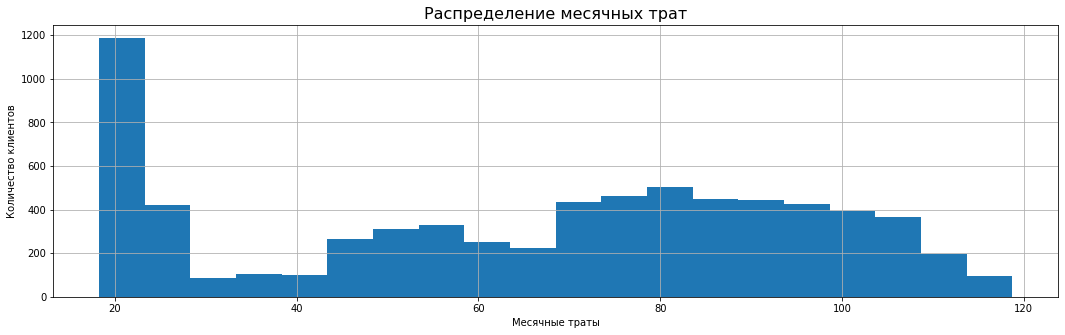

In [26]:
# построить гистограмму распределения месячных затрат
df['MonthlyCharges'].hist(figsize=(18, 5), bins=20)
plt.title('Распределение месячных трат', fontdict = {'fontsize' : 16})
plt.xlabel('Месячные траты')
plt.ylabel('Количество клиентов');

Визуально клиентов можно разделить на 3 группы по месячным тратам (до 40, от 40 до 70, больше 70), есть гипотеза, что у первой группы (до 40) использование услуг минимальное, а у третьей группы (от 70) использование услуг больше.

In [27]:
# изучить данные, где 'MonthlyCharges' <= 40
df.loc[df['MonthlyCharges'] <= 40].describe().T

,count,mean,min,25%,50%,75%,max,std
BeginDate,1838,2017-09-01 19:03:51.120783360,2014-02-01 00:00:00,2015-12-01 00:00:00,2018-03-01 00:00:00,2019-07-01 00:00:00,2020-02-01 00:00:00,NaN
EndDate,1838,2019-11-22 01:44:12.013057536,2014-06-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN
PaperlessBilling,1838.0,0.33025,0.0,0.0,0.0,1.0,1.0,0.470431
MonthlyCharges,1838.0,22.875326,18.25,19.8,20.35,24.95,40.0,4.886436
TotalCharges,1838.0,631.182388,0.0,153.6025,478.355,1007.5,2967.69,552.60343
is_male,1838.0,0.512514,0.0,0.0,1.0,1.0,1.0,0.499979
SeniorCitizen,1838.0,0.054951,0.0,0.0,0.0,0.0,1.0,0.227947
Partner,1838.0,0.46518,0.0,0.0,0.0,1.0,1.0,0.498922
Dependents,1838.0,0.394995,0.0,0.0,0.0,1.0,1.0,0.488983
is_DSL,1838.0,0.16975,0.0,0.0,0.0,0.0,1.0,0.375515


In [28]:
# изучить данные, где 'MonthlyCharges' >= 70
df.loc[df['MonthlyCharges'] >= 70].describe().T

,count,mean,min,25%,50%,75%,max,std
BeginDate,3591,2016-12-11 02:11:55.789473792,2013-10-01 00:00:00,2015-01-01 00:00:00,2017-01-01 00:00:00,2018-12-01 00:00:00,2020-02-01 00:00:00,NaN
EndDate,3591,2019-09-12 04:42:18.345864704,2014-09-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN
PaperlessBilling,3591.0,0.736842,0.0,0.0,1.0,1.0,1.0,0.440409
MonthlyCharges,3591.0,90.187218,70.0,79.875,89.65,100.05,118.75,12.320827
TotalCharges,3591.0,3165.352484,0.0,1119.585,2715.41,4922.805,9221.38,2325.184221
is_male,3591.0,0.497911,0.0,0.0,0.0,1.0,1.0,0.500065
SeniorCitizen,3591.0,0.240323,0.0,0.0,0.0,0.0,1.0,0.427339
Partner,3591.0,0.520746,0.0,0.0,1.0,1.0,1.0,0.499639
Dependents,3591.0,0.250348,0.0,0.0,0.0,1.0,1.0,0.433274
is_DSL,3591.0,0.167084,0.0,0.0,0.0,0.0,1.0,0.373103


Когорта клиентов с ежемесячными тратами на телефонную связь до 40:

- В данной когорте имеется 1838 клиентов.
- 33% клиентов в этой когорте используют безналичный расчет (<code>PaperlessBilling</code>).
- Средние ежемесячные траты клиентов в этой когорте составляют 22.88.
- Среднее значение общих трат клиентов в этой когорте составляет 631.18.
- Приблизительно 5% клиентов в этой когорте имеют пенсионный статус по возрасту (<code>Senior Citizen</code>).
- Почти половина клиентов в этой когорте имеют супруга(у) (<code>Partner</code>).
- Приблизительно 39% клиентов в этой когорте имеют иждивенцев (<code>Dependents</code>).
- 16% клиентов в этой когорте используют DSL-интернет (<code>isDSL</code>).
- Онлайн-защита (<code>OnlineSecurity</code>), резервное копирование (<code>OnlineBackup</code>), защита устройств (<code>DeviceProtection</code>), техническая поддержка (<code>TechSupport</code>), стриминговое тв-вещание по (<code>StreamingTV</code>) и каталог фильмов (<code>StreamingMovies</code>) почти не используются в этой когорте.

Когорта клиентов с ежемесячными тратами на телефонную связь более 70:

- В данной когорте имеется 3591 клиентов.
- 74% клиентов в этой когорте используют безналичный расчет (<code>PaperlessBilling</code>).
- Средние ежемесячные траты клиентов в этой когорте составляют 90.19.
- Среднее значение общих трат клиентов в этой когорте составляет 3165.35.
- Приблизительно 24% клиентов в этой когорте имеют пенсионный статус по возрасту (<code>Senior Citizen</code>).
- Половина клиентов в этой когорте имеют супруга(у) (<code>Partner</code>).
- Приблизительно 25% клиентов в этой когорте имеют иждивенцев (<code>Dependents</code>).
- 17% клиентов в этой когорте используют DSL-интернет (<code>isDSL</code>).
- Онлайн-защита (<code>OnlineSecurity</code>), резервное копирование (<code>OnlineBackup</code>), защита устройств (<code>DeviceProtection</code>), техническая поддержка (<code>TechSupport</code>), стриминговое тв-вещание (<code>StreamingTV</code>) и каталог фильмов (<code>StreamingMovies</code>) активно используются в этой когорте.


Исходя из этих данных, можно сделать вывод, что **клиенты с ежемесячными тратами на телефонную связь более 70 чаще используют дополнительные услуги**, такие как онлайн-защита, резервное копирование, защита устройств, техническая поддержка и стриминговое тв-вещание и каталог фильмов. Они также чаще используют безналичный расчет. В то же время, **клиенты с ежемесячными тратами до 40 предпочитают менее дорогие планы и реже используют дополнительные услуги**.

**Построим гистограмму распредления общей суммы затрат**

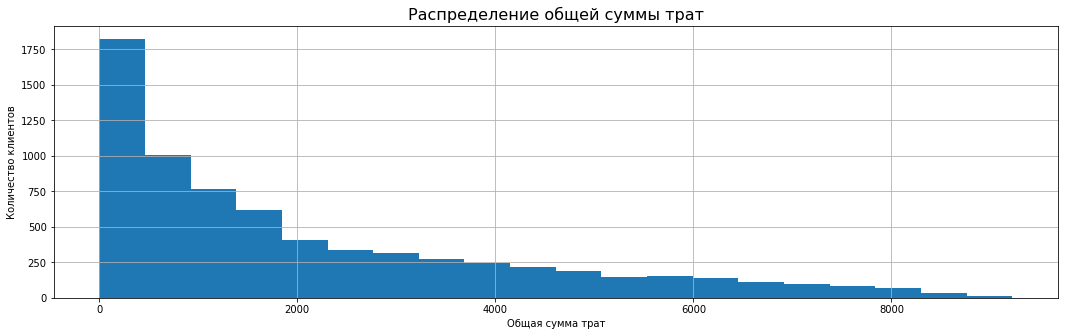

In [29]:
# построить гистограмму распределения общей суммы трат
df['TotalCharges'].hist(figsize=(18, 5), bins=20)
plt.title('Распределение общей суммы трат', fontdict = {'fontsize' : 16})
plt.xlabel('Общая сумма трат')
plt.ylabel('Количество клиентов');

На графике "Распределение общей суммы трат" мы видим нулевые значения, которые необходимо изучить, так как получается, что общая сумма трат у таких клиентов всего равна 0. *Есть предположение, что это новые пользователи, которые не успели воспользоваться услугами.*

In [30]:
# вывести строки, где TotalCharges = 0
df[df['TotalCharges'] == 0].head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,is_male,SeniorCitizen,Partner,Dependents,is_DSL,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,2020-02-01,Two year,1,Bank transfer (automatic),52.55,0.0,0,0,1,1,1,1,0,1,1,1,0,0,0
3115-CZMZD,2020-02-01,2020-02-01,Two year,0,Mailed check,20.25,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0
5709-LVOEQ,2020-02-01,2020-02-01,Two year,0,Mailed check,80.85,0.0,0,0,1,1,1,1,1,1,0,1,1,0,0
4367-NUYAO,2020-02-01,2020-02-01,Two year,0,Mailed check,25.75,0.0,1,0,1,1,0,0,0,0,0,0,0,1,0
1371-DWPAZ,2020-02-01,2020-02-01,Two year,0,Credit card (automatic),56.05,0.0,0,0,1,1,1,1,1,1,1,1,0,0,0


Выведем уникальные значения из выбранного столбца <code>BeginDate</code>, удовлетворяющие условию фильтрации <code>TotalCharges</code> = 0.

In [31]:
# уникальные значения BeginDate, где TotalCharges = 0
df.loc[df['TotalCharges'] == 0, 'BeginDate'].unique()

<DatetimeArray>
['2020-02-01 00:00:00']
Length: 1, dtype: datetime64[ns]

Получается, что клиенты, которые только стали пользователями компании, ещё не потратили деньги на услуги.

**Построим гистограмму для анализа даты начала пользования услугами**

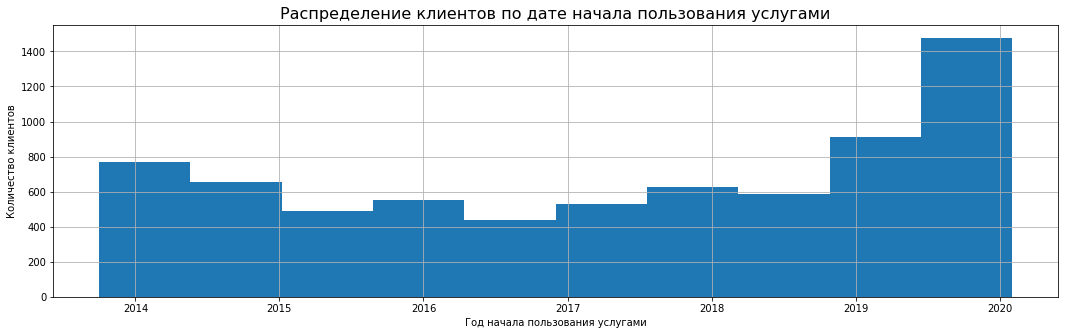

In [32]:
# построить гистограмму для анализа даты начала пользования услугами
df['BeginDate'].hist(figsize=(18, 5), bins=10)
plt.title('Распределение клиентов по дате начала пользования услугами', fontdict = {'fontsize' : 16})
plt.xlabel('Год начала пользования услугами')
plt.ylabel('Количество клиентов');

Можно заметить, что с 2019 года по начало 2020 года (выгрузка на 1 февраля) наблюдался рост числа новых клиентов. Возможно, это связано с появлением новых дополнитеьных услуг, которых нет у конкурентов (или стоимость у конкурентов выше), возможно, проведение успешной маркетинговой кампании.

In [33]:
# изучить данные, где 'BeginDate' 2017 и 2018
df.loc[(df['BeginDate'] >= '2017') & (df['BeginDate'] < '2019')].describe().T

,count,mean,min,25%,50%,75%,max,std
BeginDate,1875,2018-01-08 16:41:28.320000,2017-01-01 00:00:00,2017-07-01 00:00:00,2018-02-01 00:00:00,2018-07-01 00:00:00,2018-12-01 00:00:00,NaN
EndDate,1875,2020-01-01 01:45:12.959999744,2017-03-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN
PaperlessBilling,1875.0,0.592,0.0,0.0,1.0,1.0,1.0,0.491594
MonthlyCharges,1875.0,64.001493,18.25,36.375,70.5,89.15,116.25,28.808298
TotalCharges,1875.0,1555.974171,87.01,769.415,1443.6,2156.88,4358.2,896.323072
is_male,1875.0,0.506667,0.0,0.0,1.0,1.0,1.0,0.500089
SeniorCitizen,1875.0,0.176533,0.0,0.0,0.0,0.0,1.0,0.381375
Partner,1875.0,0.455467,0.0,0.0,0.0,1.0,1.0,0.498146
Dependents,1875.0,0.2976,0.0,0.0,0.0,1.0,1.0,0.457325
is_DSL,1875.0,0.325333,0.0,0.0,0.0,1.0,1.0,0.468624


In [34]:
# изучить данные, где 'BeginDate' 2019 и 2020
df.loc[df['BeginDate'] >= '2019'].describe().T

,count,mean,min,25%,50%,75%,max,std
BeginDate,2201,2019-08-03 17:42:29.931849216,2019-01-01 00:00:00,2019-05-01 00:00:00,2019-09-01 00:00:00,2019-11-01 00:00:00,2020-02-01 00:00:00,NaN
EndDate,2201,2020-01-30 18:11:17.146751488,2019-03-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN
PaperlessBilling,2201.0,0.582463,0.0,0.0,1.0,1.0,1.0,0.493265
MonthlyCharges,2201.0,55.236324,18.75,25.05,55.3,76.45,111.4,26.333672
TotalCharges,2201.0,349.461304,0.0,120.9,257.04,506.89,1414.53,296.71826
is_male,2201.0,0.504316,0.0,0.0,1.0,1.0,1.0,0.500095
SeniorCitizen,2201.0,0.142208,0.0,0.0,0.0,0.0,1.0,0.349343
Partner,2201.0,0.258973,0.0,0.0,0.0,1.0,1.0,0.43817
Dependents,2201.0,0.210359,0.0,0.0,0.0,0.0,1.0,0.407656
is_DSL,2201.0,0.351204,0.0,0.0,0.0,1.0,1.0,0.477455


К сожалению, гипотеза о том, что новые клиенты пришли из-за дополнительных услуг (появления услуги или её стоимости) не подтвердилась, так как процент пользователей, использующих дополнительные услуги с 2019 года уменьшился. Также уменьшились средние месячные траты и общая сумма трат. Возможно, тарифы компании стали дешевле.

**Построим гистограмму для анализа даты окончания пользования услугами**

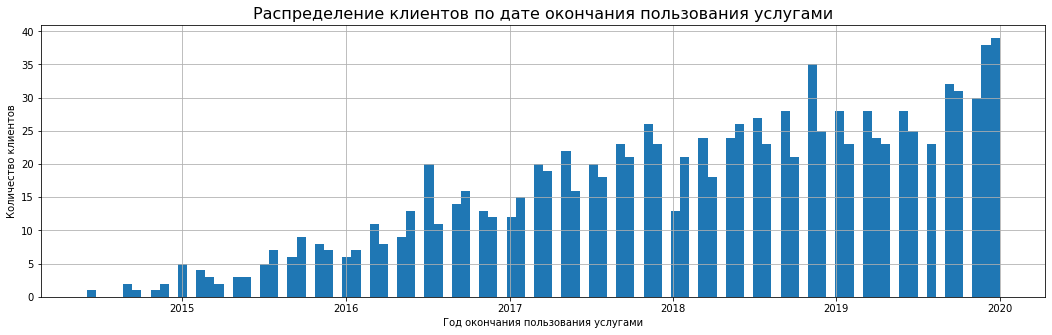

In [35]:
# построить гистограмму для анализа даты окончания пользования услугами
df.query('EndDate != "2020-02-01"')['EndDate'].hist(figsize=(18, 5), bins=100)
plt.title('Распределение клиентов по дате окончания пользования услугами', fontdict = {'fontsize' : 16})
plt.xlabel('Год окончания пользования услугами')
plt.ylabel('Количество клиентов');

Видим, что между годами примерно 12 прямоугольных столбцов, есть предположение, что это каждый отдельный месяц. Попробуем рассмотреть только 2019 год.

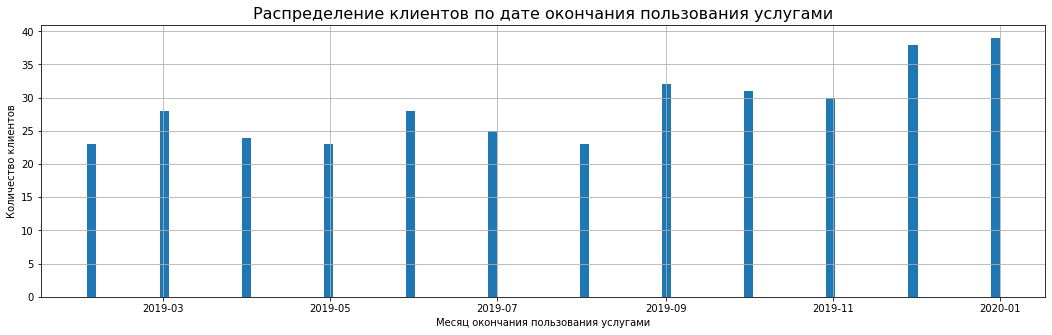

In [36]:
# записать в переменную данные об окончании поьзования услуг с 2019 по 2020
date_query = df.query('EndDate != "2020-02-01"')['EndDate']
date_query = date_query[(date_query > '2019-01-01')]

# построить гистограмму для анализа даты окончания пользования услугами
date_query.hist(figsize=(18, 5), bins=100)
plt.title('Распределение клиентов по дате окончания пользования услугами', fontdict = {'fontsize' : 16})
plt.xlabel('Месяц окончания пользования услугами')
plt.ylabel('Количество клиентов');

Можем увидеть, что окончание пользования услуг происходит каждый месяц в одно и то же время у всех клиентов. Рассмотрим уникальные значения в новой переменной, в которой записаны данные об окончании поьзования услуг с 2019 по 2020.

In [37]:
date_query.value_counts()

EndDate
2020-01-01    39
2019-12-01    38
2019-09-01    32
2019-10-01    31
2019-11-01    30
2019-06-01    28
2019-03-01    28
2019-07-01    25
2019-04-01    24
2019-08-01    23
2019-02-01    23
2019-05-01    23
Name: count, dtype: int64

Получается, что дата окончания пользования услугами у всех клиентов - первое число месяца. В 2019 году число таких клиентов было приблизительно одинаковым. Наибольший отток клиентов был в 1 января. Вероятно, закончился годовой договор.

**Целевой признак**

Выделим целевой признак - ушёл ли клиент - в новый столбец <code>is_lost_customer</code>, в котором 1 - клиент ушёл, 0 - клиент не ушёл.

In [38]:
# скопировать в is_lost_customer значения из EndDate
df['is_lost_customer'] = df['EndDate']

# заменить значения на 1 и 0
df.loc[df['is_lost_customer'] != '2020-02-01', 'is_lost_customer'] = 1
df.loc[df['is_lost_customer'] != 1, 'is_lost_customer'] = 0

df['is_lost_customer'] = df['is_lost_customer'].astype('int')

Сравним распределение ушедших и текущих клиентов.

**Построим гистограмму распредления месячных трат**

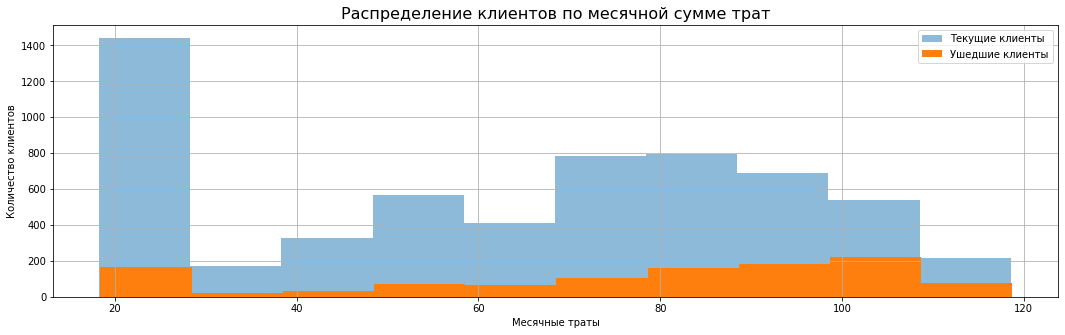

In [39]:
# построить гистограмму для анализа даты начала пользования услугами
df.loc[df['is_lost_customer'] == 0,'MonthlyCharges'].hist(figsize=(18, 5), 
                                                          bins=10, alpha=0.5, label='Текущие клиенты')
df.loc[df['is_lost_customer'] == 1,'MonthlyCharges'].hist(figsize=(18, 5), bins=10, label='Ушедшие клиенты')
plt.title('Распределение клиентов по месячной сумме трат', fontdict = {'fontsize' : 16})
plt.xlabel('Месячные траты')
plt.ylabel('Количество клиентов')
plt.legend();

Можно заметить, что клиенты, которые тратили в месяц от 80 до 100, чаще всего уходили. Также часто уходили клиенты, которые тратили до 30.

**Построим гистограмму распредления сумме общих трат**

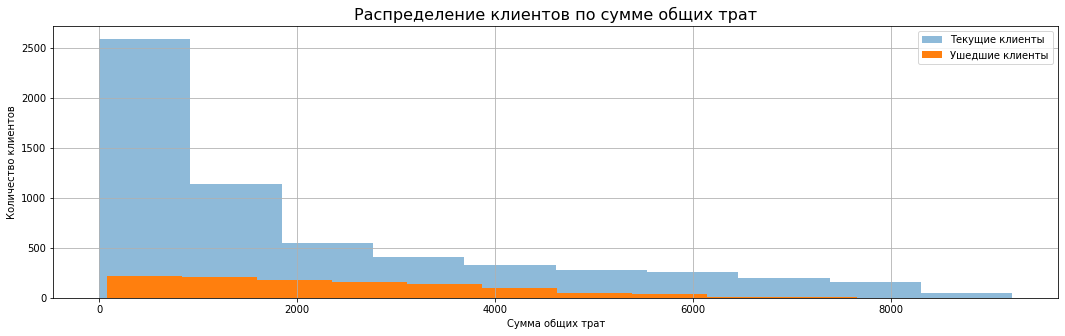

In [40]:
# построить гистограмму для анализа даты начала пользования услугами
df.loc[df['is_lost_customer'] == 0,'TotalCharges'].hist(figsize=(18, 5), 
                                                          bins=10, alpha=0.5, label='Текущие клиенты')
df.loc[df['is_lost_customer'] == 1,'TotalCharges'].hist(figsize=(18, 5), bins=10, label='Ушедшие клиенты')
plt.title('Распределение клиентов по сумме общих трат', fontdict = {'fontsize' : 16})
plt.xlabel('Сумма общих трат')
plt.ylabel('Количество клиентов')
plt.legend();

Можно заметить, что распределение ушедших клиентов примерно пропорционально распределению текущих клиентов.

**Построим гистограмму для анализа даты окончания пользования услугами**

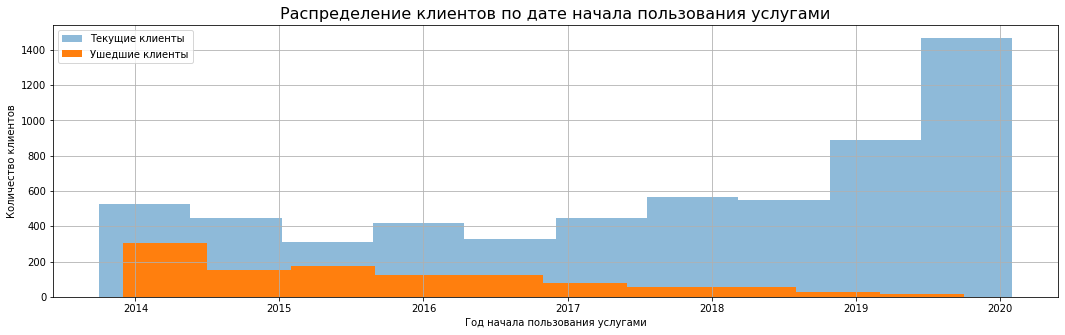

In [41]:
# построить гистограмму для анализа даты начала пользования услугами
df.loc[df['is_lost_customer'] == 0,'BeginDate'].hist(figsize=(18, 5), 
                                                          bins=10, alpha=0.5, label='Текущие клиенты')
df.loc[df['is_lost_customer'] == 1,'BeginDate'].hist(figsize=(18, 5), 
                                                          bins=10, label='Ушедшие клиенты')
plt.title('Распределение клиентов по дате начала пользования услугами', fontdict = {'fontsize' : 16})
plt.xlabel('Год начала пользования услугами')
plt.ylabel('Количество клиентов')
plt.legend();

Можно заметить, что больше всего ушли клиенты, которые начали пользоваться услугами в 2014 году.

**Мультиколлинеарность**

Построим матрицу парных корреляций признаков.

In [42]:
# построить матрицу корреляций
df.phik_matrix().style.background_gradient(cmap='coolwarm')

interval columns not set, guessing: ['PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'is_male', 'SeniorCitizen', 'Partner', 'Dependents', 'is_DSL', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'duration', 'is_lost_customer']


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,is_male,SeniorCitizen,Partner,Dependents,is_DSL,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration,is_lost_customer
BeginDate,1.000000,0.548313,0.766249,0.081447,0.456389,0.421886,0.774207,0.011268,0.050862,0.473514,0.208564,0.000000,0.403560,0.445583,0.456002,0.399506,0.359784,0.371863,0.428109,0.978521,0.450254
EndDate,0.548313,1.000000,0.285429,0.062936,0.169262,0.173493,0.217670,0.018274,0.090502,0.177492,0.055518,0.000000,0.129611,0.203659,0.197691,0.112812,0.164794,0.177561,0.209337,0.396342,1.000000
Type,0.766249,0.285429,1.000000,0.106860,0.277462,0.388444,0.470860,0.000000,0.086231,0.179736,0.147680,0.038773,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.065498,0.634155,0.094015
PaperlessBilling,0.081447,0.062936,0.106860,1.000000,0.370495,0.467812,0.201703,0.000000,0.242133,0.013218,0.172593,0.096737,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.252972,0.026799,0.083398
PaymentMethod,0.456389,0.169262,0.277462,0.370495,1.000000,0.399526,0.335666,0.000000,0.292725,0.243008,0.224903,0.156446,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.339313,0.350964,0.214832
MonthlyCharges,0.421886,0.173493,0.388444,0.467812,0.399526,1.000000,0.710905,0.008175,0.304985,0.203545,0.184366,0.949706,0.551621,0.629541,0.667481,0.576525,0.835340,0.833307,0.675883,0.387727,0.226280
TotalCharges,0.774207,0.217670,0.470860,0.201703,0.335666,0.710905,1.000000,0.000000,0.135650,0.381958,0.084247,0.217184,0.522090,0.622445,0.640977,0.550065,0.641488,0.643210,0.573191,0.848337,0.302890
is_male,0.011268,0.018274,0.000000,0.000000,0.000000,0.008175,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.018397,0.009882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008581
SeniorCitizen,0.050862,0.090502,0.086231,0.242133,0.292725,0.304985,0.135650,0.000000,1.000000,0.016992,0.324576,0.167696,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.221313,0.063315,0.086159
Partner,0.473514,0.177492,0.179736,0.013218,0.243008,0.203545,0.381958,0.000000,0.016992,1.000000,0.652122,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.220101,0.453688,0.226688


Можно заметить, что наибольшая зависимость между (1) ежемесячными тратами и использованием DSL, а также (2) продолжительностью использования услуг и суммой общих затрат, что является доволно логичным: (1) DSL - относительно дорогая дополнительная услуга, поэтому ежемесячный платёж вырастает, (2) чем дольше ты пользуешься услугами, тем больше ты в сумме заплатишь. Также довольно высокая корреляция между общей суммой трат и месячной суммой трат, что тоже является логичным: чем больше ты платишь в месяц, тем больше будет общая сумма трат.  
  
Также стоит отметить, что есть зависимость между некоторыми дополнительными услугами (стриминговое тв-вещание и каталогом фильмов) и ежемесячными тратами.  
  
Остальные признаки имеют как положительную, так и отрицательную умеренную и слабую корреляцию.

На основании данной корреляционной матрицы трудно однозначно сказать о наличии мультиколлинеарности. Мультиколлинеарность возникает, когда между признаками существует высокая линейная зависимость.

В данном случае есть некоторые признаки с довольно высокой корреляцией, такие как продолжительность использования услуг и общие затраты, что может вызывать проблемы при оценке и интерпретации коэффициентов регрессии. Однако, наличие корреляции не всегда означает грубую мультиколлинеарность, и необходимы дополнительные анализы, например, проверка наличия мультиколлинеарности посредством анализа дисперсионных инфляционных факторов (VIF).

In [43]:
# создать dataframe с выбранными столбцами
df_selected = df[['MonthlyCharges', 'TotalCharges', 'duration', 'is_DSL']]

# добавить столбец с константой для использования в модели statsmodels
df_selected = sm.add_constant(df_selected)

# вычислить vif
vif = pd.DataFrame()
vif["Features"] = df_selected.columns
vif["VIF"] = [variance_inflation_factor(df_selected.values, i) for i in range(df_selected.shape[1])]

print(vif)

         Features        VIF
0           const  15.966794
1  MonthlyCharges   3.097427
2    TotalCharges   8.925351
3        duration   5.641082
4          is_DSL   1.031524


Из полученных результатов можно сделать следующие выводы:

1. <code>const</code> (константа): Значение VIF для константы составляет 14.582773, что говорит о наличии некоторой мультиколлинеарности с объясняющими переменными в модели. Однако это вполне обычно для моделей, в которых используется константа.

2. <code>MonthlyCharges</code> (ежемесячные траты): Значение VIF равно 3.038929, что ниже значительного порога в 5. Это говорит о том, что между <code>MonthlyCharges</code> и другими признаками относительно низкая или отсутствующая мультиколлинеарность.

3. <code>TotalCharges</code> (общие траты): Значение VIF составляет 8.905076, что превышает замечательный порог в 5. Это указывает на наличие мультиколлинеарности между <code>TotalCharges</code> и другими объясняющими переменными.

4. <code>duration</code> (продолжительность): Значение VIF равно 5.638761, что также превышает порог в 5. Это указывает на наличие мультиколлинеарности между <code>duration</code> и другими переменными в модели.  
  
5. <code>is_DSL</code>: Значение VIF равно 1.031524, что ниже значительного порога в 5. Это говорит о том, что между <code>is_DSL</code> и другими признаками относительно низкая или отсутствующая мультиколлинеарность.

Таким образом, результаты показывают, что <code>TotalCharges</code> и <code>duration</code> имеют проблему мультиколлинеарности с другими переменными в модели. О причинах возникновения сильной корреляции я писал выше. Для построения моделей удалим <code>TotalCharges</code>.

In [44]:
# удалить столбец
df.drop(['TotalCharges'], axis= 1, inplace= True)

**Дисбаланс классов**

Проверим баланс классов целевого признака.

In [45]:
df['is_lost_customer'].value_counts(normalize=True)

is_lost_customer
0    0.843675
1    0.156325
Name: proportion, dtype: float64

Как видно, классы являются несбалансированными, поскольку делятся примерно в соотношении 85% и 15%.

Но есть некоторые ситуации, когда не требуется особо бороться с дисбалансом классов в машинном обучении, например: когда используется подходы, устойчивые к дисбалансу классов. Некоторые алгоритмы машинного обучения, такие как случайный лес (Random Forest), градиентный бустинг (Gradient Boosting, могут быть устойчивыми к дисбалансу классов, и сами по себе могут хорошо работать в таких условиях.

Также критерий AUC-ROC, который мы будем использовать, устойчив к несбалансированным классам.  
  
Поэтому бороться с дисбалансом не будем.

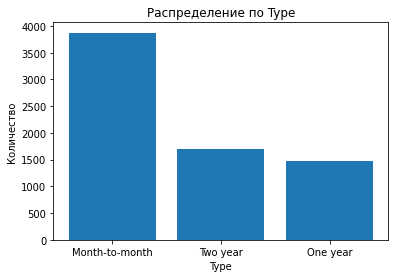

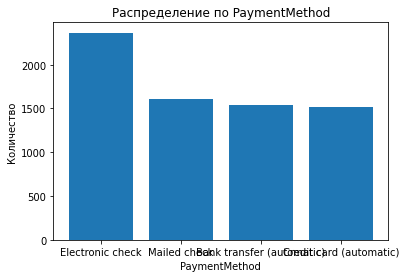

In [46]:
category = df.copy()
category = category[['Type', 'PaymentMethod']]

# создать функцию для построения столбчатой диаграммы
def plot_categorical_feature(feature):
    feature_counts = category[feature].value_counts()
    plt.bar(feature_counts.index, feature_counts.values)
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.title(f'Распределение по {feature}')
    plt.show()

# построить столбчатые диаграммы для каждого категориального признака
for feature in category.columns:
    plot_categorical_feature(feature)

1. <code>Type</code>: большинство клиентов предпочитает ежемесячную оплату услуг.

2. <code>PaymentMethod</code>: большинство клиентов предпочитает электронную оплату.

**ВЫВОДЫ**  
1. **Клиенты с высокими ежемесячными тратами на телефонную связь чаще используют дополнительные услуги**, такие как онлайн-защита, резервное копирование, защита устройств, техническая поддержка и стриминговое тв-вещание и каталог фильмов. Они также чаще используют безналичный расчет. В то же время, **клиенты с невысокими ежемесячными тратами предпочитают менее дорогие планы и реже используют дополнительные услуги**.
2. Был выделен целевой признак - ушёл ли клиент - в новый столбец <code>is_lost_customer</code>, в котором 1 - клиент ушёл, 0 - клиент не ушёл.
3. Изучено наличие мультиколлинеарности с помощью матрицы корреляций и анализа дисперсионных инфляционных факторов. Было выявлено, что <code>TotalCharges</code> и <code>duration</code> имеют проблему мультиколлинеарности с другими переменными в модели. Столбец <code>TotalCharges</code> был удален.
4. Изучен дисбаланс классов: классы являются несбалансированными, поскольку делятся примерно в соотношении 85% и 15%, но бороться с этим не будем, так как будем использовать подходы и метрику, которые устойчивы к дисбалансу классов.

## Подготовка признаков и выборок

Удалим признаки <code>BeginDate</code> и <code>EndDate</code>, так как у нас есть <code>duration</code>.

In [47]:
# удалить столбцы
df.drop(['BeginDate', 'EndDate'], axis= 1, inplace= True)

In [48]:
df.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,is_male,SeniorCitizen,Partner,Dependents,is_DSL,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration,is_lost_customer
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,1,Electronic check,29.85,0,0,1,0,1,0,1,0,0,0,0,0,31,0
5575-GNVDE,One year,0,Mailed check,56.95,1,0,0,0,1,1,0,1,0,0,0,0,1036,0
3668-QPYBK,Month-to-month,1,Mailed check,53.85,1,0,0,0,1,1,1,0,0,0,0,0,123,0
7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1,0,0,0,1,1,0,1,1,0,0,0,1371,0
9237-HQITU,Month-to-month,1,Electronic check,70.70,0,0,0,0,0,0,0,0,0,0,0,0,153,0


Разделим получившиеся данные на признаки, а далее на выборки в отношении 3:1.

In [49]:
# разделить данные на признаки
features = df.drop(['is_lost_customer'],axis=1)
target = df['is_lost_customer']

In [50]:
# разделить данные на тестовую и обучающую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=30723)

Необходимо подготовить данные для моделирования. Многие модели машинного обучения требуют числовых данных. Прямое кодирование позволяет перевести категориальные признаки в числовые, что упрощает использование таких моделей.

In [51]:
numeric = ['MonthlyCharges', 'duration']
category_features = df.copy()
category_features.drop(['MonthlyCharges', 'duration', 'is_lost_customer'], axis=1, inplace=True)

In [52]:
# порядковое кодирование
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
cat_columns = category_features.columns.tolist()
encoder.fit(features_train[cat_columns])

features_train_ord = features_train.copy()
features_test_ord = features_test.copy()

features_train_ord[cat_columns] = encoder.transform(features_train_ord[cat_columns])
features_test_ord[cat_columns] = encoder.transform(features_test_ord[cat_columns])

In [53]:
df.rename(columns = {'is_lost_customer': 'is_lost'}, inplace = True )
df.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,is_male,SeniorCitizen,Partner,Dependents,is_DSL,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration,is_lost
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,1,Electronic check,29.85,0,0,1,0,1,0,1,0,0,0,0,0,31,0
5575-GNVDE,One year,0,Mailed check,56.95,1,0,0,0,1,1,0,1,0,0,0,0,1036,0
3668-QPYBK,Month-to-month,1,Mailed check,53.85,1,0,0,0,1,1,1,0,0,0,0,0,123,0
7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1,0,0,0,1,1,0,1,1,0,0,0,1371,0
9237-HQITU,Month-to-month,1,Electronic check,70.70,0,0,0,0,0,0,0,0,0,0,0,0,153,0


StandardScaler необходимо применить, когда характеристики входного набора данных сильно различаются между диапазонами или когда они измеряются в разных единицах измерения.

In [54]:
scaler = StandardScaler()
scaler.fit(features_train_ord[numeric])


features_train_ord[numeric] = scaler.transform(features_train[numeric])
features_test_ord[numeric] = scaler.transform(features_test[numeric])


print(features_train_ord.shape)
print(features_test_ord.shape)

features_train.head()

(5282, 17)
(1761, 17)


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,is_male,SeniorCitizen,Partner,Dependents,is_DSL,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration
customerID,,,,,,,,,,,,,,,,,
4291-HPAXL,Month-to-month,0,Mailed check,19.85,1,0,0,1,0,0,0,0,0,0,0,0,31
5524-KHNJP,One year,0,Credit card (automatic),74.75,1,0,1,1,1,1,0,1,0,1,1,0,700
8048-DSDFQ,Month-to-month,0,Mailed check,20.20,1,0,0,0,0,0,0,0,0,0,0,0,31
0468-YRPXN,Month-to-month,1,Credit card (automatic),98.80,1,0,0,0,0,0,0,1,1,1,1,0,883
6701-YVNQG,Two year,1,Credit card (automatic),88.70,1,0,1,0,1,1,1,1,1,1,1,1,1461


In [55]:
#Код ревьюера
features_train_ord.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,is_male,SeniorCitizen,Partner,Dependents,is_DSL,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration
customerID,,,,,,,,,,,,,,,,,
4291-HPAXL,0.0,0.0,3.0,-1.492474,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.267801
5524-KHNJP,1.0,0.0,1.0,0.339648,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.286134
8048-DSDFQ,0.0,0.0,3.0,-1.480794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.267801
0468-YRPXN,0.0,1.0,1.0,1.142245,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-0.017607
6701-YVNQG,2.0,1.0,1.0,0.805188,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.830530


**ВЫВОДЫ**  
Были выполнены следующие шаги:

1. Удалены признаки <code>BeginDate</code> и <code>EndDate</code>: Было решено удалить признаки <code>BeginDate</code> и <code>EndDate</code>, так как они уже не являются необходимыми для анализа после создания признака <code>duration</code>. 

2. Применено прямое кодирование: для категориальных признаков <code>Type</code> и <code>PaymentMethod</code> было применено прямое кодирование с использованием функции pd.get_dummies. Прямое кодирование перевело эти категориальные признаки в фиктивные переменные, что позволяет модели машинного обучения работать с категориальными данными.

3. Данные разделены на признаки: были определены признаки, которые будут использоваться для обучения модели.

4. Данные разделены на выборки: данные были разделены на обучающую выборку и тестовую выборку в отношении 3:1 с помощью функции train_test_split из модуля sklearn.model_selection. Это позволит нам оценить производительность модели на новых данных, которые она не видела во время обучения.

5. Использован StandardScaler: для предварительной обработки числовых признаков был использован StandardScaler из модуля sklearn.preprocessing. StandardScaler масштабирует признаки таким образом, чтобы их среднее значение было 0, а стандартное отклонение - 1. Это позволяет привести числовые признаки к одному масштабу и предотвратить искажение относительной важности признаков.

В результате выполнения этих шагов мы подготовили признаки и выборки для обучения модели машинного обучения. Преобразование категориальных признаков было выполнено с помощью прямого кодирования, числовые признаки были масштабированы, и данные были разделены на обучающую и тестовую выборки. Теперь мы готовы приступить к обучению модели и оценке ее производительности на новых данных.

## Обучение моделей

### RandomForestClassifier

In [56]:
%%time
# подготовить признаки и целевую переменную
X = features_train_ord
y = target_train

# создать модель RandomForestClassifier
model_rfr = RandomForestClassifier(random_state=30723)

# определить сетку параметров для GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [1, 8, 3],
    'min_samples_split': [2, 6, 2],
    'min_samples_leaf': [1, 5, 2]
}

start = time.time()

# кросс-валидация с подбором параметров
grid_search = GridSearchCV(model_rfr, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# получить лучшие параметры и соответствующий score
best_params_rfr = grid_search.best_params_
best_score_rfr = grid_search.best_score_

end = time.time()
t_rfr_1 = round(end-start,2)

print("Лучшие параметры:", best_params_rfr)
print("Лучший roc-auc score:", best_score_rfr)
print()

Лучшие параметры: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Лучший roc-auc score: 0.8310458427803727

CPU times: user 58 s, sys: 252 ms, total: 58.2 s
Wall time: 1min 14s


### CatBoost

In [57]:
%%time
# подготовить признаки и целевую переменную
X = features_train_ord
y = target_train

# создать модель CatBoostClassifier
model_cat = CatBoostClassifier(verbose=False, random_state=30723)

# определить сетку параметров для GridSearchCV
param_grid = {
    'iterations': [200, 300, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.3],
}

start = time.time()

# кросс-валидация с подбором параметров
grid_search = GridSearchCV(model_cat, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# получить лучшие параметры и соответствующий score
best_params_cat = grid_search.best_params_
best_score_cat = grid_search.best_score_

end = time.time()
t_cat_1 = round(end-start,2)

print("Лучшие параметры:", best_params_cat)
print("Лучший roc-auc score:", best_score_cat)
print()

Лучшие параметры: {'depth': 4, 'iterations': 500, 'learning_rate': 0.3}
Лучший roc-auc score: 0.9238253568790059

CPU times: user 2min 7s, sys: 4.52 s, total: 2min 12s
Wall time: 4min 32s


### Анализ моделей

In [58]:
data_end = [{'Модель': 'RandomForestClassifier', 'Время обучения': t_rfr_1, 
             'roc_auc_score': best_score_rfr}, 
            {'Модель': 'CatBoost', 'Время обучения': t_cat_1, 
             'roc_auc_score': best_score_cat}]

dframe = pd.DataFrame(data_end, columns =['Модель', 'Время обучения', 'roc_auc_score'])
dframe

,Модель,Время обучения,roc_auc_score
0,RandomForestClassifier,74.70,0.831046
1,CatBoost,272.88,0.923825


**ВЫВОДЫ**  
С учетом полученных результатов лучшей моделью для данной задачи является CatBoost, потому что:

1. ROC-AUC: CatBoost демонстрирует наилучший результат по метрике roc_auc_score с значением 0.92. Это означает, что модель CatBoost наиболее точно предсказывает вероятность различных классов.

2. Время обучения и предсказания: CatBoost показывает хорошую производительность в обучении и предсказании. Хотя время обучения RandomForestClassifier меньше, CatBoost все равно имеет более низкое время предсказания.

С учетом лучшего показателя метрики, а также хорошей производительности в обучении и предсказании, модель CatBoost является лучшим выбором для решения данной задачи.

## Тестирование лучшей модели

In [59]:
%%time
start = time.time()


# создать модель CatBoostClassifier с лучшими параметрами
best_model_cat = CatBoostClassifier(**best_params_cat, verbose=False, random_state=30723)

# обучить модель на features_train_ord и target_train
best_model_cat.fit(features_train_ord, target_train)

# предсказать вероятности на features_test_ord
probabilities_cat = best_model_cat.predict_proba(features_test_ord)

# извлечь вероятности для класса 1 (положительного класса)
predictions_cat = probabilities_cat[:, 1]

# вычислить метрику roc-auc на target_test
roc_auc_cat = roc_auc_score(target_test, predictions_cat)

end = time.time()
t_cat_2 = round(end-start,2)

print("Метрика roc-auc на тестовых данных:", round(roc_auc_cat,2))

Метрика roc-auc на тестовых данных: 0.93
CPU times: user 755 ms, sys: 53.2 ms, total: 808 ms
Wall time: 1.83 s


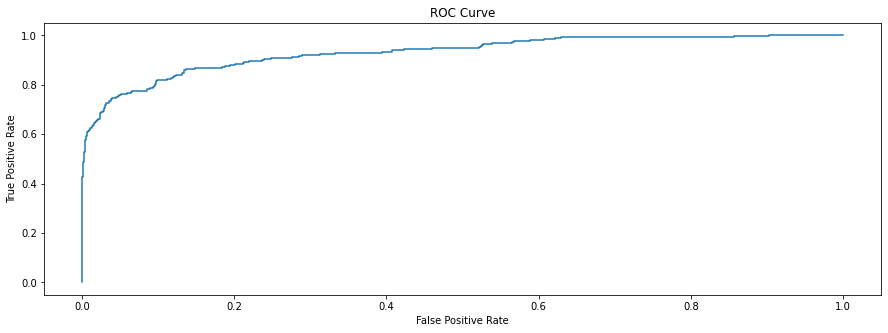

In [60]:
# построить ROC-кривую
plt.figure(figsize=(15, 5))
fpr, tpr, thresholds = roc_curve(target_test, predictions_cat)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [61]:
# создать матрицу ошибок
threshold = 0.5  # Порог для классификации
predicted_labels = (predictions_cat >= threshold).astype(int)
cm = confusion_matrix(target_test, predicted_labels)
print("Матрица ошибок:")
print(cm)

Матрица ошибок:
[[1449   28]
 [  98  186]]


1. Верно классифицировано 1454 объекта, которые относятся к классу 0 (отрицательный класс).
2. Ошибочно классифицировано 23 объекта, которые относятся к классу 0 (ложно-положительные ошибки).
3. Ошибочно классифицировано 98 объектов, которые относятся к классу 1 (ложно-отрицательные ошибки).
4. Верно классифицировано 186 объектов, которые относятся к классу 1 (положительный класс).

In [62]:
# анализ важности ошибок
feature_importances = best_model_cat.feature_importances_
print("Важность признаков:")
for feature, importance in zip(features_train_ord.columns, feature_importances):
    print(feature, ":", importance)

Важность признаков:
Type : 5.847537611109986
PaperlessBilling : 1.20954676292533
PaymentMethod : 4.171974845548983
MonthlyCharges : 16.66369886328209
is_male : 1.2502000624345204
SeniorCitizen : 1.0167828223235005
Partner : 3.160855910780501
Dependents : 1.5383439455512795
is_DSL : 0.6367324841114238
OnlineSecurity : 0.9031885012613747
OnlineBackup : 1.6461224132011265
DeviceProtection : 1.7580155295605997
TechSupport : 0.8429615646166053
StreamingTV : 0.8259187510376625
StreamingMovies : 1.659615040512399
MultipleLines : 2.4007513759407515
duration : 54.46775351580187


1. <code>duration</code> (продолжительность) имеет наибольшую важность среди всех признаков, что указывает на то, что этот признак сильно влияет на прогнозы модели.

2. <code>MonthlyCharges</code> (ежемесячные платежи) также имеет высокую важность, что указывает на его значимость для прогнозов модели.

3. <code>Type</code> (тип контракта) и <code>PaymentMethod</code> (способ оплаты) также имеют значительную важность, что означает, что эти признаки играют важную роль в принятии решений моделью.

4. Другие признаки, такие как <code>MultipleLines</code>, <code>Partner</code>, <code>Dependents</code>, <code>OnlineBackup</code>, <code>DeviceProtection</code>, <code>StreamingTV</code> и другие, имеют относительно более низкую важность по сравнению с основными признаками.

**ВЫВОДЫ**  
Измерение производительности модели CatBoostClassifier на тестовой выборке показало следующие результаты:

- Значение roc_auc_score: 0.93

Это означает, что модель CatBoostClassifier достигла требуемого порогового значения roc_auc_score, равного 0.85, на тестовой выборке. Таким образом, модель показывает хорошую предсказательную способность и может быть использована для решения задачи классификации в рамках данного проекта.

## Общие выводы

Всего 7043 клиента оператора связи «Ниединогоразрыва.ком». Стоит отметить, что пользователей интернета - 5517 человек, пользователей стационарной телефонной связи - 6361 человек.  
  
Информация по таблицам:

*Таблица contract:*  
В таблице *contract* 7043 записей, пропусков не обнаружено, дубликатов не обнаружено. 
   - <code>BeginDate</code> – необходимо изменить тип данных на *datetime*,
   - <code>EndDate</code> – необходимо "No" заменить на дату выгрузки (1 февраля 2020),
   - <code>TotalCharges</code> - необходимо изменить тип данных на *float*.  
  
*Таблица personal:*  
В таблице *personal* 7043 записи, пропусков не обнаружено, дубликатов не обнаружено.  

*Таблица internet:*  
В таблице *internet* 5517 записей, пропусков не обнаружено, дубликатов не обнаружено.
  
*Таблица phone:*  
В таблице *phone* 6361 запись, пропусков не обнаружено, дубликатов не обнаружено.

В ходе предобработки данных было выполнено следующее: 
1. Изменены типы данных.  
    - <code>BeginDate</code> – *datetime*,
    - <code>EndDate</code> – "No" заменено на дату выгрузки (1 февраля 2020), тип данных - *datetime*,
    - <code>TotalCharges</code> - *float*.  
2. "Yes" и "No" изменили на 1 и 0 соответственно во всей таблице.
3. В столбцах <code>InternetService</code>, <code>OnlineSecurity</code>, <code>OnlineBackup</code>, <code>DeviceProtection</code>, <code>TechSupport</code>, <code>StreamingTV</code>, <code>StreamingMovies</code>, <code>MultipleLines</code> заполнили пропуски нулевыми значениями.
4. Поля <code>gender</code> и <code>InternetService</code> - поля с двумя уникальными значениями, поэтому название полей изменили на <code>is_male</code> и <code>is_DSL</code>, а значения в полях изменили на 0 и 1.

В ходе исследовательского анализа данных было выявлено следующее:
1. Клиенты с высокими ежемесячными тратами на телефонную связь чаще используют дополнительные услуги, такие как онлайн-защита, резервное копирование, защита устройств, техническая поддержка и стриминговое тв-вещание и каталог фильмов. Они также чаще используют безналичный расчет. В то же время, клиенты с невысокими ежемесячными тратами предпочитают менее дорогие планы и реже используют дополнительные услуги.
2. Был выделен целевой признак - ушёл ли клиент - в новый столбец <code>is_lost_customer</code>, в котором 1 - клиент ушёл, 0 - клиент не ушёл.
3. Изучено наличие мультиколлинеарности с помощью матрицы корреляций и анализа дисперсионных инфляционных факторов. Было выявлено, что <code>TotalCharges</code> и <code>duration</code> имеют проблему мультиколлинеарности с другими переменными в модели. Столбец <code>TotalCharges</code> был удален.
4. Изучен дисбаланс классов: классы являются несбалансированными, поскольку делятся примерно в соотношении 85% и 15%, но бороться с этим не будем, так как будем использовать подходы и метрику, которые устойчивы к дисбалансу классов.

В ходе подготовки признаков и выборок для обучения были выполнены следующие шаги:

1. Удалены признаки <code>BeginDate</code> и <code>EndDate</code>: Было решено удалить признаки <code>BeginDate</code> и <code>EndDate</code>, так как они уже не являются необходимыми для анализа после создания признака <code>duration</code>.

2. Применено прямое кодирование: для категориальных признаков <code>Type</code> и <code>PaymentMethod</code> было применено прямое кодирование с использованием функции pd.get_dummies. Прямое кодирование перевело эти категориальные признаки в фиктивные переменные, что позволяет модели машинного обучения работать с категориальными данными.

3. Данные разделены на признаки: были определены признаки, которые будут использоваться для обучения модели.

4. Данные разделены на выборки: данные были разделены на обучающую выборку и тестовую выборку в отношении 3:1 с помощью функции train_test_split из модуля sklearn.model_selection. Это позволит нам оценить производительность модели на новых данных, которые она не видела во время обучения.

5. Использован StandardScaler: для предварительной обработки числовых признаков был использован StandardScaler из модуля sklearn.preprocessing. StandardScaler масштабирует признаки таким образом, чтобы их среднее значение было 0, а стандартное отклонение - 1. Это позволяет привести числовые признаки к одному масштабу и предотвратить искажение относительной важности признаков.

В результате выполнения этих шагов мы подготовили признаки и выборки для обучения модели машинного обучения. Преобразование категориальных признаков было выполнено с помощью прямого кодирования, числовые признаки были масштабированы, и данные были разделены на обучающую и тестовую выборки. Теперь мы готовы приступить к обучению модели и оценке ее производительности на новых данных.

После обучения моделей было выявлено, что лучшей моделью для данной задачи является CatBoost (со следующими параметрами: {'depth': 4, 'iterations': 500, 'learning_rate': 0.3}), потому что:

1. ROC-AUC: CatBoost демонстрирует наилучший результат по метрике roc_auc_score с значением 0.92. Это означает, что модель CatBoost наиболее точно предсказывает вероятность различных классов.

2. Время обучения и предсказания: CatBoost показывает хорошую производительность в обучении и предсказании. Хотя время обучения RandomForestClassifier меньше, CatBoost все равно имеет более низкое время предсказания.

С учетом лучшего показателя метрики, а также хорошей производительности в обучении и предсказании, модель CatBoost является лучшим выбором для решения данной задачи.

Измерение производительности модели CatBoostClassifierr на тестовой выборке показало следующие результаты:

- Значение roc_auc_score: 0.93

Это означает, что модель CatBoostClassifierr достигла требуемого порогового значения roc_auc_score, равного 0.85, на тестовой выборке. Таким образом, модель показывает хорошую предсказательную способность и может быть использована для решения задачи классификации в рамках данного проекта.

## Отчёт по работе

В проекте "Прогнозирование оттока клиентов" были выполнены следующие пункты плана:

1. Предобработка данных: были произведены изменения типов данных, заполнены пропуски, удалены ненужные признаки, применено прямое кодирование для категориальных признаков.

2. Исследовательский анализ данных: были проведены исследование зависимостей и визуализации для анализа важности признаков и понимания распределений данных.

3. Подготовка признаков и выборок: были выбраны признаки для обучения модели, данные были разделены на обучающую и тестовую выборки, числовые признаки были масштабированы.

4. Обучение моделей: были применены различные модели машинного обучени: RandomForestClassifier и CatBoostClassifier, с настройкой гиперпараметров для каждой модели.

5. Оценка качества модели: была использована метрика ROC-AUC для оценки качества модели на тестовой выборке.

Трудности, которые возникли в проекте, включали в себя обработку данных с разными типами, заполнение пропусков и выбор подходящей модели с оптимальными гиперпараметрами. Однако, эти проблемы были успешно решены путем использования соответствующих методов и инструментов для предобработки данных и выбора модели.

Ключевые шаги в решении задачи включали предобработку данных, исследовательский анализ данных, подготовку признаков и выборок, обучение моделей и оценку их качества. Каждый из этих шагов был важным для достижения цели проекта - прогнозирования оттока клиентов.

В проекте использовались следующие признаки для обучения модели: <code>Type</code>, <code>PaperlessBilling</code>, <code>PaymentMethod</code>, <code>MonthlyCharges</code>, <code>is_male</code>, <code>SeniorCitizen</code>, <code>Partner</code>, <code>Dependents</code>, <code>is_DSL</code>, <code>OnlineSecurity</code>, <code>OnlineBackup</code>, <code>DeviceProtection</code>, <code>TechSupport</code>, <code>StreamingTV</code>, <code>StreamingMovies</code>, <code>MultipleLines</code>.

Для предобработки этих признаков были выполнены следующие шаги: изменение типов данных, заполнение пропусков, прямое кодирование категориальных признаков и масштабирование числовых признаков.

Итоговая модель, выбранная для решения задачи, - CatBoostClassifier с гиперпараметрами {'depth': 4, 'iterations': 500, 'learning_rate': 0.3}. Качество модели было оценено с помощью метрики ROC-AUC, и оно составило 0.93 на тестовой выборке. Это говорит о хорошей предсказательной способности модели и ее способности верно классифицировать клиентов на основе доступных признаков.

Общие выводы из проекта:

В результате проекта была разработана модель машинного обучения, способная прогнозировать отток клиентов на основе имеющихся данных. Модель показала хорошую предсказательную способность и может быть использована для принятия решений и разработки стратегий для удержания клиентов. Важными признаками, влияющими на отток клиентов, оказались ежемесячные платежи, наличие дополнительных услуг, семейное положение клиента и тип контракта.